### Name: a v s adityavardhan
#### GRIP@TSF NOVEMBER BATCH

In [26]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_csv('Iris.csv')

In [3]:
data_frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_frame.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data_frame.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Analysis

### Outlier Checking

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Petal Width in cm')

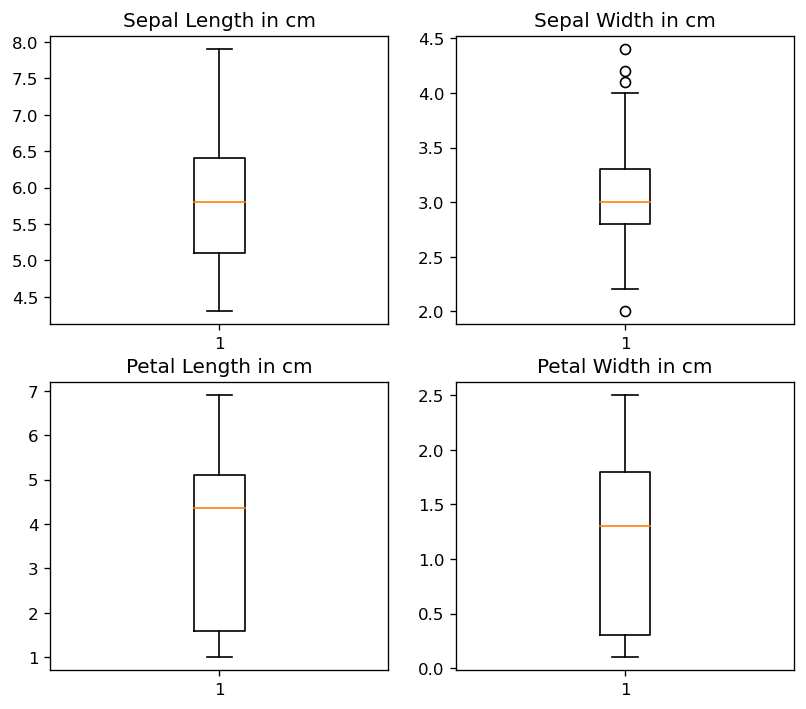

In [7]:
plt.figure(figsize=(8,7),dpi=120)
plt.subplot(2,2,1)
plt.boxplot(data_frame["SepalLengthCm"])
plt.title("Sepal Length in cm")
plt.subplot(2,2,2)
plt.boxplot(data_frame["SepalWidthCm"])
plt.title("Sepal Width in cm")
plt.subplot(2,2,3)
plt.boxplot(data_frame["PetalLengthCm"])
plt.title("Petal Length in cm")
plt.subplot(2,2,4)
plt.boxplot(data_frame["PetalWidthCm"])
plt.title("Petal Width in cm")

### Observation

We found an outlier in Sepal Width hence we remove those outliers to get correct predictions

In [8]:
data_frame = data_frame.drop(data_frame[data_frame["SepalWidthCm"]>4.0].index)


In [9]:
data_frame = data_frame.drop(data_frame[data_frame["SepalWidthCm"]<2.1].index)

Text(0.5, 1.0, 'Petal Width in cm')

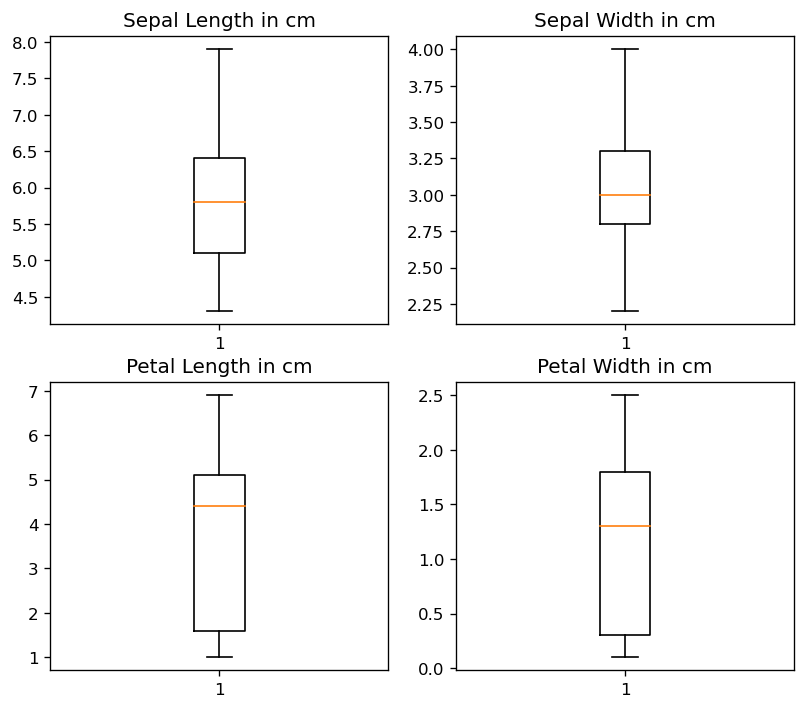

In [10]:
plt.figure(figsize=(8,7),dpi=120)
plt.subplot(2,2,1)
plt.boxplot(data_frame["SepalLengthCm"])
plt.title("Sepal Length in cm")
plt.subplot(2,2,2)
plt.boxplot(data_frame["SepalWidthCm"])
plt.title("Sepal Width in cm")
plt.subplot(2,2,3)
plt.boxplot(data_frame["PetalLengthCm"])
plt.title("Petal Length in cm")
plt.subplot(2,2,4)
plt.boxplot(data_frame["PetalWidthCm"])
plt.title("Petal Width in cm")

### Sepal length vs Sepal Width Comparison

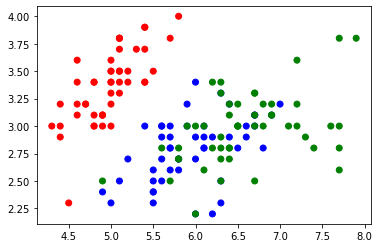

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
ax.scatter(data_frame["SepalLengthCm"],data_frame["SepalWidthCm"],c=data_frame['Species'].apply(lambda x: colors[x]))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
indep = data_frame.drop(["Species"],axis=1)
dep = data_frame["Species"]
train_x,test_x,train_y,test_y = train_test_split(indep,dep,random_state=42,stratify=dep)

In [15]:
train_x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,2,4.9,3.0,1.4,0.2
38,39,4.4,3.0,1.3,0.2
84,85,5.4,3.0,4.5,1.5
149,150,5.9,3.0,5.1,1.8
68,69,6.2,2.2,4.5,1.5


In [16]:
test_x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,15,5.8,4.0,1.2,0.2
76,77,6.8,2.8,4.8,1.4
67,68,5.8,2.7,4.1,1.0
98,99,5.1,2.5,3.0,1.1
21,22,5.1,3.7,1.5,0.4


In [17]:
train_y.value_counts()/len(train_y)

Iris-versicolor    0.339450
Iris-virginica     0.339450
Iris-setosa        0.321101
Name: Species, dtype: float64

In [18]:
test_y.value_counts()/len(test_y)

Iris-virginica     0.351351
Iris-setosa        0.324324
Iris-versicolor    0.324324
Name: Species, dtype: float64

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [21]:
pred = model.predict(test_x)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(pred,test_y)

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 13]], dtype=int64)

In [24]:
from sklearn import tree
tree.export_graphviz(model,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

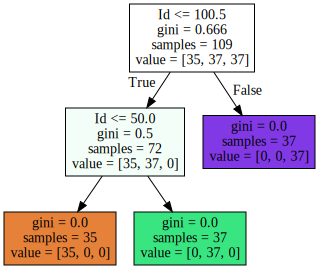

In [25]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)